# wavdetect on merged datasets

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
find_chandra_obsid "ngc4485"

# obsid  sepn   inst grat   time    obsdate   piname              target
1579      3.1 ACIS-S NONE   19.5 2000-11-03   Murray "NGC 4485/NGC 4490"
4725      3.1 ACIS-S NONE   38.5 2004-07-29  Roberts "NGC 4485/NGC 4490"
4726      3.1 ACIS-S NONE   39.6 2004-11-20  Roberts "NGC 4485/NGC 4490"
20999     4.2 ACIS-S NONE   14.9 2018-11-06 Patnaude            SN2008ax


In [3]:
/bin/rm -rf 1579 4725 4726
download_chandra_obsid 1579,4725,4726 evt1,pbk,bias,flt,asol,bpix,mtl,msk,stat


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits       41 Mb  ####################          < 1 s  74423.7 kb/s
  asol     fits        4 Mb  ####################          < 1 s  53030.2 kb/s
  mtl      fits      844 Kb  ####################          < 1 s  24159.3 kb/s
  stat     fits      700 Kb  ####################          < 1 s  25809.2 kb/s
  bias     fits      494 Kb  ####################          < 1 s  12442.5 kb/s
  bias     fits      445 Kb  ####################          < 1 s  21553.2 kb/s
  bias     fits      441 Kb  ####################          < 1 s  858.8 kb/s
  bias     fits      425 Kb  ####################          < 1 s  20191.6 kb/s
  bias     fits      423 Kb  ####################          < 1 s  19560.9 kb/s
  bias     fits      419 Kb  ####################          < 1 s  18728.4 kb/s
  bpix     fits       21 Kb  ####################      

In [4]:
chandra_repro "1579,4725,4726" ./repro clob+


Running chandra_repro
version: 14 September 2021



Processing input directory '/proj/sds/Staff/kjg/Threads/wavdetect_merged/1579'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running the destreak tool on the evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Output from acis_process_events:
# acis_process_events (CIAO 4.14): The following error occurred 24 times:
	dsAPEPULSEHEIGHTERR -- WARNING: pulse height is less than split threshold when performing serial CTI adjustment.
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/wavdetect_merged/repro/acisf01579_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...

Cleaning up intermediat

In [5]:
merge_obs "repro/*repro_evt2.fits" ngc4485 bands=broad bin=2 clob+ psfecf=0.9 psfmerge=exptime

Running merge_obs
Version: 23 February 2021

Verifying 3 observations.
Using CSC ACIS broad science energy band.
Calculating new tangent point.
New tangent point: RA=12h 30m 35.088s Dec=41d 38' 46.73"

Observations to be reprojected:

  Obsid  Obs Date   Exp    DETNAM     SIM_Z    FP   Sepn   PA  
                   (ks)                (mm)    (K)   (')  (deg)
---------------------------------------------------------------
1 1579  2000-11-03  19.5 ACIS-235678 -190.140 153.3   0.4   -28
2 4725  2004-07-29  38.5 ACIS-235678 -190.140 153.4   2.1  -158
3 4726  2004-11-20  39.6 ACIS-235678 -190.140 153.4   1.8   +31

WARNING - DATAMODE values differ:
  Obsid 1579 has DATAMODE=FAINT and the rest have VFAINT

Running tasks in parallel with 4 processors.
Reprojecting 3 event files to a common tangent point.
Merging reprojected events files to ngc4485_merged_evt.fits

Calculating the output grid

The merged images will have 2143 by 2426 pixels, a pixel size of 0.984 arcsec,
    and cover x=1876

[1] 57035
[1]+  Done                    ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off ngc4485_broad_thresh.img -block 2 -scale log -scale limits 0 200 ngc4485_broad_thresh.expmap -block 1 -scale linear -scale minmax -saveimage png ds9_01.png


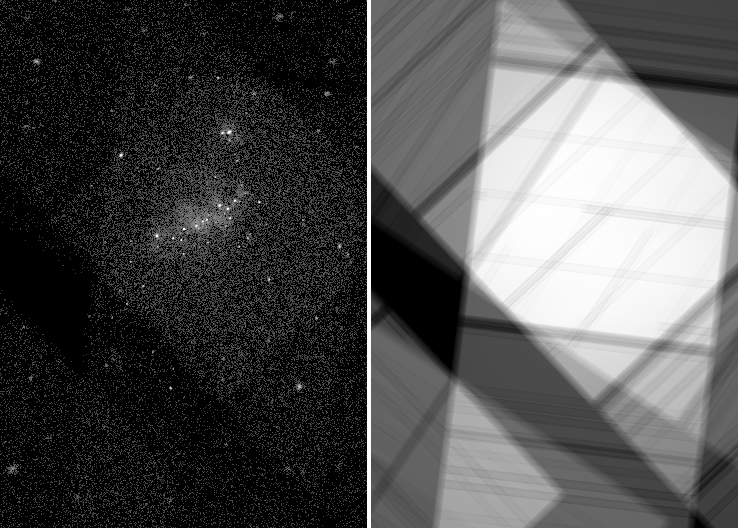

In [6]:
ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off  \
   ngc4485_broad_thresh.img -block 2 \
   -scale log -scale limits 0 200 \
   ngc4485_broad_thresh.expmap -block 1 \
   -scale linear -scale minmax \
   -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

[1] 57088
[1]+  Done                    ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off ngc4485_broad_thresh.img -block 2 -scale log -scale limits 0 200 ngc4485_broad_thresh.psfmap -block 1 -scale log -scale minmax -cmap load $ASCDS_CONTRIB/data/5_ramps.lut -saveimage png ds9_01a.png


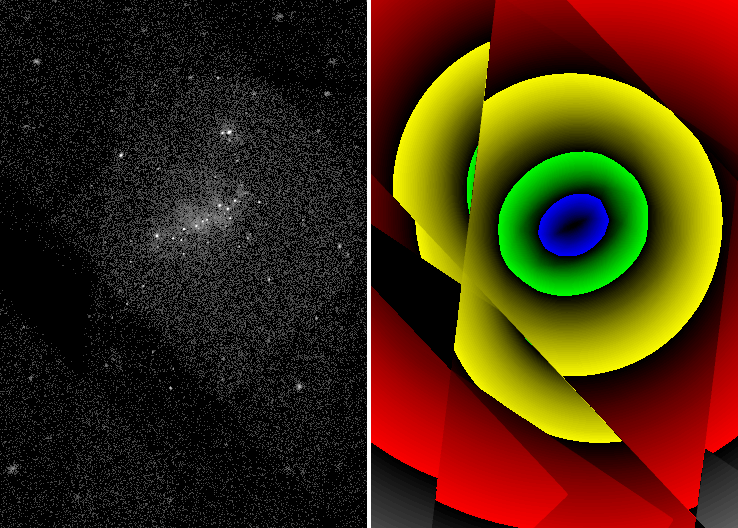

In [7]:
ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off  \
   ngc4485_broad_thresh.img -block 2 \
   -scale log -scale limits 0 200 \
   ngc4485_broad_thresh.psfmap -block 1 \
   -scale log -scale minmax \
   -cmap load $ASCDS_CONTRIB/data/5_ramps.lut \
   -saveimage png ds9_01a.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01a.png

In [8]:
pset wavdetect \
  infile='ngc4485_broad_thresh.img' \
  expfile='ngc4485_broad_thresh.expmap' \
  scales='2 4 8 16 24 32 48' \
  outfile='wav_exptime_src.fits' \
  scellfile='wav_exptime_cell.fits' \
  imagefile='wav_exptime_recon.fits' \
  defnbkgfile='wav_exptime_nbkg.fits' \
  psffile='ngc4485_broad_thresh.psfmap'

wavdetect mode=h clobber=yes

[1] 57640
[1]+  Done                    ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off ngc4485_broad_thresh.img -block 2 -scale log -scale limits 0 200 -region wav_exptime_src.fits -saveimage png ds9_01b.png


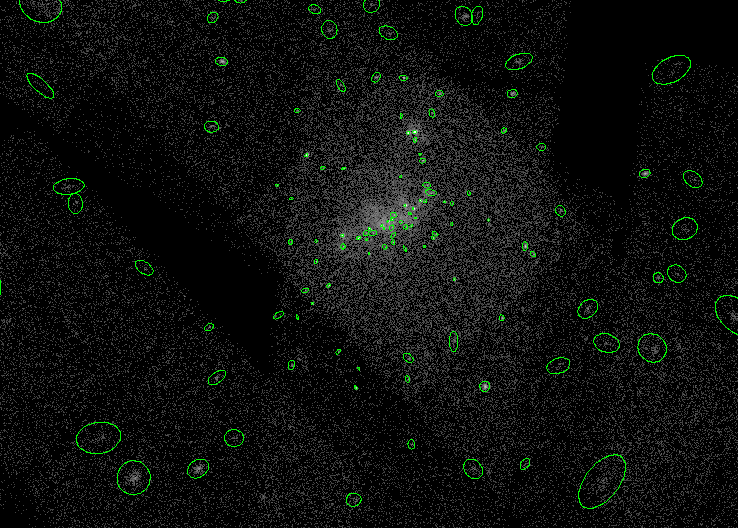

In [9]:
ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off \
   ngc4485_broad_thresh.img -block 2 \
   -scale log -scale limits 0 200 \
   -region wav_exptime_src.fits \
   -saveimage png ds9_01b.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01b.png

## 1. No PSF Map

In [10]:
pset wavdetect \
  infile='ngc4485_broad_thresh.img' \
  expfile='ngc4485_broad_thresh.expmap' \
  scales='2 4 8 16 24 32 48' \
  outfile='wav_none_src.fits' \
  scellfile='wav_none_cell.fits' \
  imagefile='wav_none_recon.fits' \
  defnbkgfile='wav_none_nbkg.fits' \
  psffile=''
wavdetect mode=h clobber=yes

[1] 58896
[1]+  Done                    ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off ngc4485_broad_thresh.img -block 2 -scale log -scale limits 0 200 -region wav_none_src.fits -saveimage png ds9_02.png


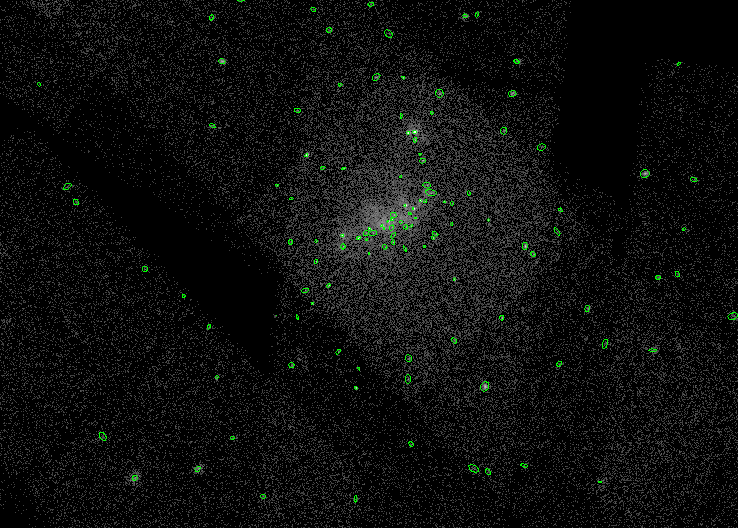

In [11]:
ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off \
   ngc4485_broad_thresh.img -block 2 \
   -scale log -scale limits 0 200 \
   -region wav_none_src.fits \
   -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

## Create PSF maps

In [12]:
###punlearn mkpsfmap
###pset mkpsfmap energy=2.3 spectrum="" ecf=0.9 units=arcsec mode=h clob+
###mkpsfmap ngc4485_1579_broad_thresh.img ngc4485_1579_broad_thresh.psfmap
###mkpsfmap ngc4485_4725_broad_thresh.img ngc4485_4725_broad_thresh.psfmap
###mkpsfmap ngc4485_4726_broad_thresh.img ngc4485_4726_broad_thresh.psfmap

dmhistory ngc4485_1579_broad_thresh.psfmap mkpsfmap | sed s,`pwd`/,,g | fmt -w 120 -t

# dmhistory (CIAO 4.14): WARNING: Found and corrected "pixlib" library parameters

# dmhistory (CIAO 4.14): WARNING: Found and corrected "pixlib" library parameters

# dmhistory (CIAO 4.14): WARNING: Found and corrected "pixlib" library parameters

# dmhistory (CIAO 4.14): WARNING: Found and corrected "pixlib" library parameters

mkpsfmap infile="ngc4485_1579_broad_thresh.img[sky=MASK(ngc4485_1579_broad_thresh.expmap)]"
   outfile="tmptgzv8hzr.psfmap[PSFMAP]" energy="2.3" spectrum="" ecf="0.9" psffile="CALDB" units="arcsec"
   geompar="geom.par" clobber="yes"



[1] 59372
[1]+  Done                    ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off -scale log -zoom 0.25 -cmap load $ASCDS_CONTRIB/data/5_ramps.lut -view colorbar yes ngc4485_1579_broad_thresh.psfmap ngc4485_4725_broad_thresh.psfmap ngc4485_4726_broad_thresh.psfmap -tile mode column -saveimage png ds9_03.png


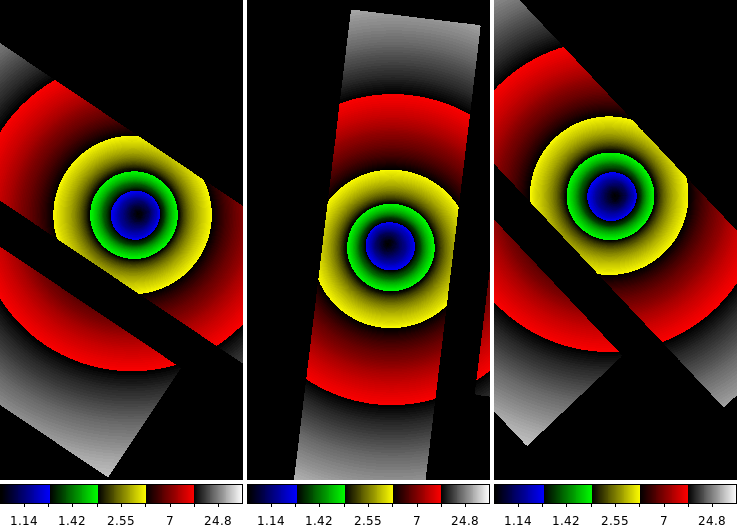

In [13]:
ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off -scale log -zoom 0.25\
  -cmap load $ASCDS_CONTRIB/data/5_ramps.lut \
  -view colorbar yes \
  ngc4485_1579_broad_thresh.psfmap \
  ngc4485_4725_broad_thresh.psfmap \
  ngc4485_4726_broad_thresh.psfmap \
  -tile mode column \
  -saveimage png ds9_03.png &
sleep 10
xpaset -p ds9 quit

display < ds9_03.png

## 2a: Exposure Time Weighted PSFs

In [14]:
### dmimgcalc infile="ngc4485_????_broad_thresh.psfmap" infile2=none outfile=weighted_mean_broad_thresh.psfmap \
###  op="imgout=((img1_exposure*img1)+(img2_exposure*img2)+(img3_exposure*img3))/(img1_exposure+img2_exposure+img3_exposure)" cl+

In [15]:
### dmhedit weighted_mean_broad_thresh.psfmap file= op=add key=BUNIT value="arcsec"

In [16]:
# do not punlearn here!
pset wavdetect \
  outfile='wav_weighted_mean_src.fits' \
  scellfile='wav_weighted_mean_cell.fits' \
  imagefile='wav_weighted_mean_recon.fits' \
  defnbkgfile='wav_weighted_mean_nbkg.fits' \
  psffile='ngc4485_broad_thresh.psfmap' 

wavdetect mode=h clobber=yes

[1] 59870
[1]+  Done                    ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off -view colorbar yes -cmap load $ASCDS_CONTRIB/data/5_ramps.lut ngc4485_broad_thresh.psfmap -scale log -zoom 0.5 ngc4485_broad_thresh.img -zoom 2 -block 2 -scale log -scale limits 0 200 -cmap gray -region wav_weighted_mean_src.fits -frame prev -saveimage png ds9_04.png


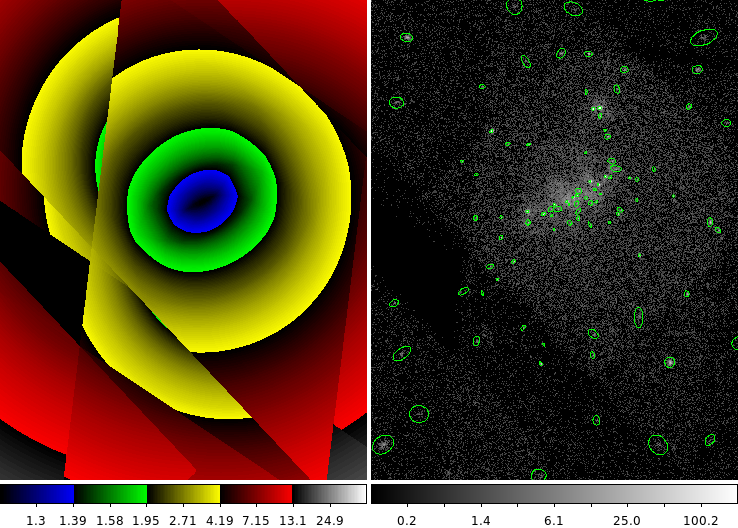

In [17]:
ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off -view colorbar yes \
  -cmap load $ASCDS_CONTRIB/data/5_ramps.lut \
  ngc4485_broad_thresh.psfmap -scale log -zoom 0.5 \
  ngc4485_broad_thresh.img -zoom 2 -block 2 \
  -scale log -scale limits 0 200 -cmap gray \
  -region wav_weighted_mean_src.fits \
  -frame prev \
  -saveimage png ds9_04.png &
sleep 10
xpaset -p ds9 quit

display < ds9_04.png

## 2b. Exposure Map weighted

In [18]:
/bin/ls ngc4485_????_broad_thresh.psfmap > psfmap.lis
cat psfmap.lis

ngc4485_1579_broad_thresh.psfmap
ngc4485_4725_broad_thresh.psfmap
ngc4485_4726_broad_thresh.psfmap


In [19]:
/bin/ls ngc4485_????_broad_thresh.expmap > expmap.lis
cat expmap.lis

ngc4485_1579_broad_thresh.expmap
ngc4485_4725_broad_thresh.expmap
ngc4485_4726_broad_thresh.expmap


In [20]:
paste psfmap.lis expmap.lis | awk '{print $1"[sky=mask("$2")][opt null=0,full]"}' > p2.lis
cat p2.lis

ngc4485_1579_broad_thresh.psfmap[sky=mask(ngc4485_1579_broad_thresh.expmap)][opt null=0,full]
ngc4485_4725_broad_thresh.psfmap[sky=mask(ngc4485_4725_broad_thresh.expmap)][opt null=0,full]
ngc4485_4726_broad_thresh.psfmap[sky=mask(ngc4485_4726_broad_thresh.expmap)][opt null=0,full]


In [21]:
dmimgcalc "@p2.lis,@expmap.lis" none expweighted_mean_broad_thresh.psfmap \
  op="imgout=((img4*img1)+(img5*img2)+(img6*img3))/(img4+img5+img6)" clob+
dmhedit expweighted_mean_broad_thresh.psfmap file= op=add key=BUNIT value="arcsec"

BTIMDRFT values are different...FAIL...
BTIMNULL values are different...FAIL...
BTIMRATE values are different...FAIL...
omit - DEC_PNT values different more than 0.000300
OBI_NUM values are different...FAIL...
omit - RA_PNT values different more than 0.000300
omit - ROLL_NOM values different more than 1.000000
omit - ROLL_PNT values different more than 1.000000


In [22]:
# do not punlearn here
pset wavdetect \
  outfile='wav_expweighted_mean_src.fits' \
  scellfile='wav_expweighted_mean_cell.fits' \
  imagefile='wav_expweighted_mean_recon.fits' \
  defnbkgfile='wav_expweighted_mean_nbkg.fits' \
  psffile='expweighted_mean_broad_thresh.psfmap' 
  
wavdetect mode=h clobber=yes

[1] 60412
[1]+  Done                    ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off -view colorbar yes -cmap load $ASCDS_CONTRIB/data/5_ramps.lut expweighted_mean_broad_thresh.psfmap -scale log -zoom 0.5 ngc4485_broad_thresh.img -zoom 2 -block 2 -scale log -scale limits 0 200 -cmap gray -region wav_expweighted_mean_src.fits -frame prev -saveimage png ds9_05.png


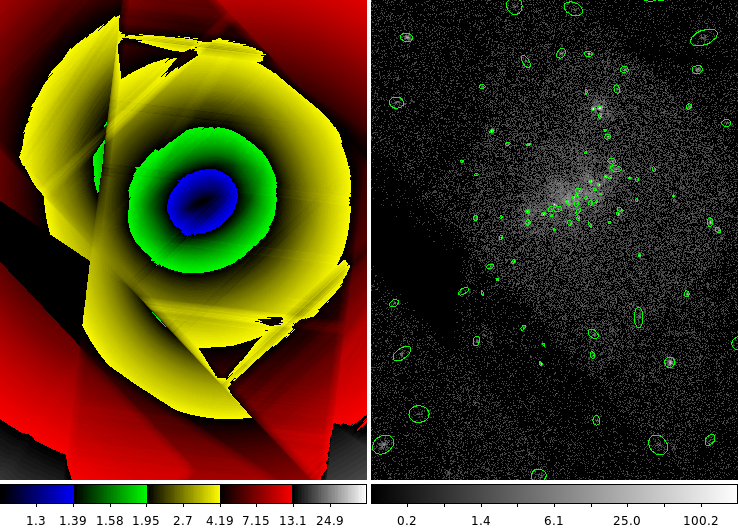

In [23]:
ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off -view colorbar yes \
   -cmap load $ASCDS_CONTRIB/data/5_ramps.lut \
   expweighted_mean_broad_thresh.psfmap -scale log -zoom 0.5 \
   ngc4485_broad_thresh.img -zoom 2 -block 2 \
   -scale log -scale limits 0 200 -cmap gray \
   -region wav_expweighted_mean_src.fits \
   -frame prev \
   -saveimage png ds9_05.png &
sleep 10
xpaset -p ds9 quit

display < ds9_05.png

## Min PSF 

In [24]:
dmimgfilt "ngc4485_????_broad_thresh.psfmap" min_broad_thresh.psfmap min "point(0,0)" clob+
dmhedit min_broad_thresh.psfmap file= op=add key=BUNIT value="arcsec"


BTIMDRFT values are different...FAIL...
BTIMNULL values are different...FAIL...
BTIMRATE values are different...FAIL...
omit - DEC_PNT values different more than 0.000300
OBI_NUM values are different...FAIL...
omit - RA_PNT values different more than 0.000300
omit - ROLL_NOM values different more than 1.000000
omit - ROLL_PNT values different more than 1.000000


In [25]:
###ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off -view colorbar yes \
###   -cmap load $ASCDS_CONTRIB/data/5_ramps.lut \
###   min_broad_thresh.psfmap -scale log -zoom 0.5 \
###   -saveimage png ds9_06.png &
###sleep 10
###xpaset -p ds9 quit
###
###display < ds9_06.png   
   

In [26]:
###dmimgthresh ngc4485_1579_broad_thresh.psfmap ngc4485_1579_fov_broad_thresh.psfmap expfile=ngc4485_1579_broad_thresh.expmap cut=1 value=INDEF clob+
###dmimgthresh ngc4485_4725_broad_thresh.psfmap ngc4485_4725_fov_broad_thresh.psfmap expfile=ngc4485_4725_broad_thresh.expmap cut=1 value=INDEF clob+
###dmimgthresh ngc4485_4726_broad_thresh.psfmap ngc4485_4726_fov_broad_thresh.psfmap expfile=ngc4485_4726_broad_thresh.expmap cut=1 value=INDEF clob+


In [27]:
###dmimgfilt "ngc4485_????_fov_broad_thresh.psfmap" min_broad_thresh.psfmap min "point(0,0)" clob+
###dmhedit min_broad_thresh.psfmap file= op=add key=BUNIT value="arcsec"


In [28]:
# do not punlearn here
pset wavdetect \
  outfile='wav_min_src.fits' \
  scellfile='wav_min_cell.fits' \
  imagefile='wav_min_recon.fits' \
  defnbkgfile='wav_min_nbkg.fits' \
  psffile='min_broad_thresh.psfmap' 

wavdetect mode=h clobber=yes

[1] 61074
[1]+  Done                    ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off -view colorbar yes -cmap load $ASCDS_CONTRIB/data/5_ramps.lut min_broad_thresh.psfmap -scale log -zoom 0.5 ngc4485_broad_thresh.img -zoom 2 -block 2 -scale log -scale limits 0 200 -cmap gray -region wav_min_src.fits -frame prev -saveimage png ds9_07.png


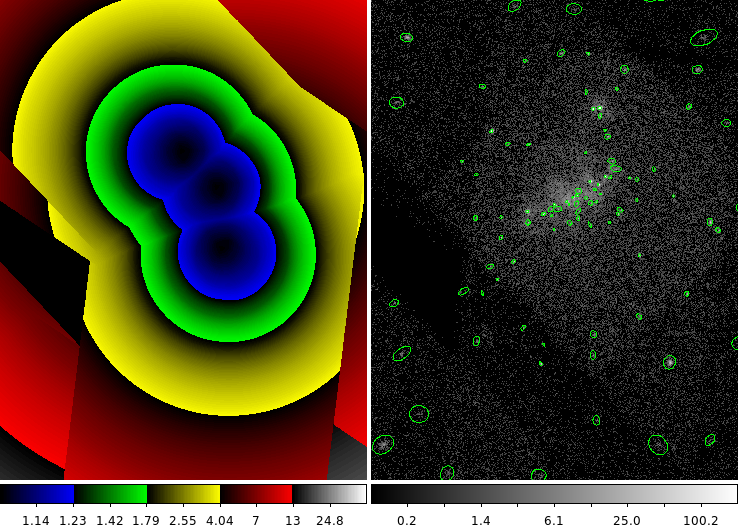

In [29]:
ds9 -view info off -view panner off -view magnifier off -view buttons off -view colorbar off -view colorbar yes \
   -cmap load $ASCDS_CONTRIB/data/5_ramps.lut \
   min_broad_thresh.psfmap -scale log -zoom 0.5 \
   ngc4485_broad_thresh.img -zoom 2 -block 2 \
   -scale log -scale limits 0 200 -cmap gray \
   -region wav_min_src.fits \
   -frame prev \
   -saveimage png ds9_07.png &
sleep 10
xpaset -p ds9 quit

display < ds9_07.png

# Cleanup

In [30]:
###/bin/rm -rf 1579 4725 4726
###/bin/rm -rf repro
